<a href="https://colab.research.google.com/github/vagdevi17/salary/blob/main/salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import gdown

In [3]:
import csv

In [4]:
pip install matplotlib

In [5]:
pip install seaborn


In [6]:
# Provide the direct link to the CSV file in Google Drive
url = 'https://drive.google.com/file/d/1CAa-xga0nC2NfkeE7IvVgUIyNgdogAZq/view?usp=sharing'

# Download the CSV file using gdown with the --fuzzy option
output = 'data_professionals_salaries.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

# Load the downloaded CSV file into a Pandas DataFrame
df = pd.read_csv(output, engine='python', encoding='utf-8', encoding_errors='replace')

Downloading...
From: https://drive.google.com/uc?id=1CAa-xga0nC2NfkeE7IvVgUIyNgdogAZq
To: /content/data_professionals_salaries.csv
100%|██████████| 197k/197k [00:00<00:00, 79.4MB/s]


In [7]:
# Summary statistics and data types
print(df.describe())
print(df.info())

               AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  2636.000000       2637.000000  2637.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.908228   36876.956944     4.604469          4.603193     1.114933   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data co

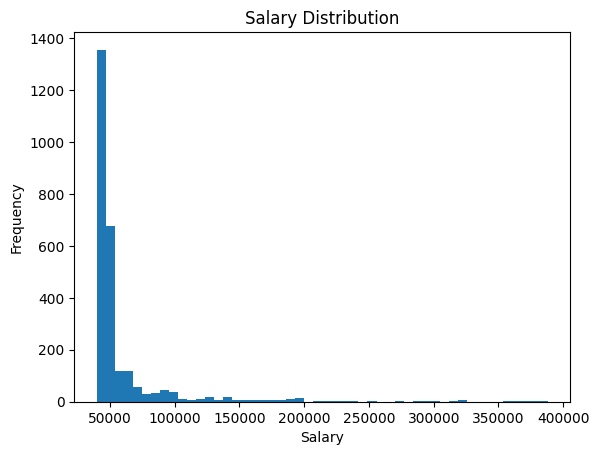

In [8]:
import matplotlib.pyplot as plt

# Histogram of salaries
plt.hist(df['SALARY'], bins=50)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()


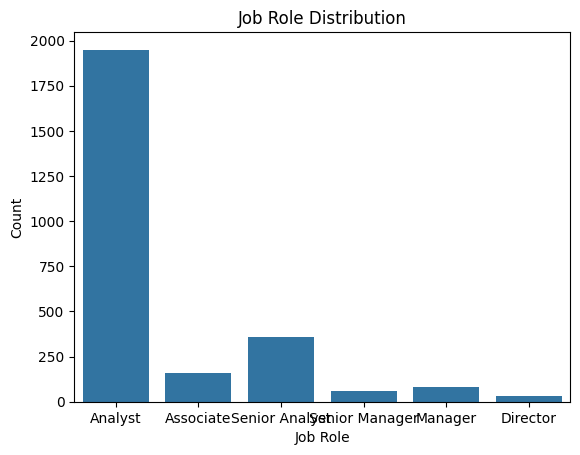

In [9]:
# Bar chart of job roles
import seaborn as sns
sns.countplot(x='DESIGNATION', data=df)
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Job Role Distribution')
plt.show()

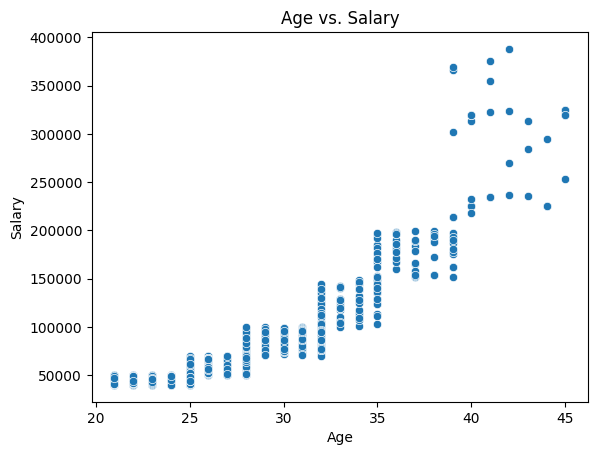

In [10]:
# Scatter plot of age vs. salary
sns.scatterplot(x='AGE', y='SALARY', data=df)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')
plt.show()

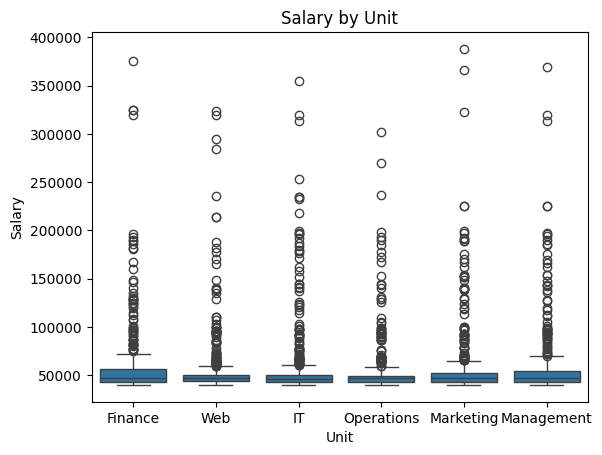

In [11]:
# Box plot of salary by unit
sns.boxplot(x='UNIT', y='SALARY', data=df)
plt.xlabel('Unit')
plt.ylabel('Salary')
plt.title('Salary by Unit')
plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('data_professionals_salaries.csv')

# Column names based on the provided dataset
experience_col = 'PAST EXP'  # Past experience in years
job_role_col = 'DESIGNATION'
performance_col = 'RATINGS'
salary_col = 'SALARY'

# Handling missing data in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Handling missing data in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# 1. Years of Experience Binning
bins = [0, 2, 5, 10, 20, 30]
labels = ['0-2 years', '3-5 years', '6-10 years', '11-20 years', '21-30 years']
df['experience_bin'] = pd.cut(df[experience_col], bins=bins, labels=labels)

# 2. Job Role Encoding
df = pd.get_dummies(df, columns=[job_role_col], drop_first=True)

# 3. Performance Interaction Terms
if performance_col in df.columns:
    df['performance_experience'] = df[performance_col] * df[experience_col]

# 4. Salary Bands
salary_bins = [0, 50000, 100000, 150000, 200000]
salary_labels = ['<50K', '50K-100K', '100K-150K', '150K+']
df['salary_band'] = pd.cut(df[salary_col], bins=salary_bins, labels=salary_labels)

# Optionally drop original columns if not needed anymore
df.drop([experience_col, performance_col], axis=1, inplace=True, errors='ignore')

# Split the data into features (X) and target (y)
X = df.drop(columns=[salary_col, 'salary_band'])
y = df[salary_col]

# Handle any remaining missing values (if any) in X
numeric_X_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_X_cols = X.select_dtypes(include=['object']).columns

# Fill missing values
X[numeric_X_cols] = X[numeric_X_cols].apply(lambda x: x.fillna(x.median()))
X[categorical_X_cols] = X[categorical_X_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables that were not one-hot encoded
X = pd.get_dummies(X, drop_first=True)

# Scale/Normalize Features
scaler = StandardScaler()
X[numeric_X_cols] = scaler.fit_transform(X[numeric_X_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed features
print(X_train[:5])
print(y_train[:5])


           AGE  LEAVES USED  LEAVES REMAINING  DESIGNATION_Associate  \
2395 -0.705594    -0.978252          0.977352                  False   
440  -0.193476     0.760497         -0.761553                  False   
508   0.574702     0.760497         -0.761553                  False   
76   -0.193476     1.412528         -1.413643                  False   
522  -0.193476    -1.630283          1.629441                  False   

      DESIGNATION_Director  DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
2395                 False                False                       False   
440                  False                False                       False   
508                  False                False                        True   
76                   False                False                       False   
522                  False                False                       False   

      DESIGNATION_Senior Manager  performance_experience  FIRST NAME_ABBIE  \
2395          

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Display the results
for name, metrics in results.items():
    print(f"{name} Performance:")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"Root Mean Squared Error: {metrics['RMSE']}")
    print(f"R^2 Score: {metrics['R2']}\n")


Linear Regression Performance:
Mean Absolute Error: 5939.183647948127
Mean Squared Error: 122788744.21199456
Root Mean Squared Error: 11081.008266940087
R^2 Score: 0.9260547953197076

Decision Tree Performance:
Mean Absolute Error: 4987.261363636364
Mean Squared Error: 171765100.87878788
Root Mean Squared Error: 13105.918543878865
R^2 Score: 0.8965605062343138

Random Forest Performance:
Mean Absolute Error: 4489.234299242424
Mean Squared Error: 99969643.27762593
Root Mean Squared Error: 9998.482048672486
R^2 Score: 0.9397967966736664

Gradient Boosting Performance:
Mean Absolute Error: 4710.024892580113
Mean Squared Error: 116291060.46946055
Root Mean Squared Error: 10783.83329199133
R^2 Score: 0.9299677969337639



In [14]:
!pip install Flask


In [15]:
!pip install Flask pyngrok joblib


In [51]:
# Install necessary packages
!pip install Flask pyngrok scikit-learn pandas joblib

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Load your dataset
df = pd.read_csv('data_professionals_salaries.csv')

# Column names based on the provided dataset
experience_col = 'PAST EXP'  # Past experience in years
job_role_col = 'DESIGNATION'
performance_col = 'RATINGS'
salary_col = 'SALARY'

# Handling missing data in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Handling missing data in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# 1. Years of Experience Binning
bins = [0, 2, 5, 10, 20, 30]
labels = ['0-2 years', '3-5 years', '6-10 years', '11-20 years', '21-30 years']
df['experience_bin'] = pd.cut(df[experience_col], bins=bins, labels=labels)

# 2. Job Role Encoding
df = pd.get_dummies(df, columns=[job_role_col], drop_first=True)

# 3. Performance Interaction Terms
if performance_col in df.columns:
    df['performance_experience'] = df[performance_col] * df[experience_col]

# 4. Salary Bands
salary_bins = [0, 50000, 100000, 150000, 200000]
salary_labels = ['<50K', '50K-100K', '100K-150K', '150K+']
df['salary_band'] = pd.cut(df[salary_col], bins=salary_bins, labels=salary_labels)

# Optionally drop original columns if not needed anymore
df.drop([experience_col, performance_col], axis=1, inplace=True, errors='ignore')

# Split the data into features (X) and target (y)
X = df.drop(columns=[salary_col, 'salary_band'])
y = df[salary_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric columns (scaling) and categorical columns (one-hot encoding)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define a pipeline that combines preprocessing and the model
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Train the best model pipeline (e.g., Gradient Boosting) for deployment
best_model_pipeline = create_pipeline(GradientBoostingRegressor(random_state=42))
best_model_pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(best_model_pipeline, 'salary_prediction_pipeline.pkl')

# Save the Flask app to app.py
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writefile(line, cell):
    with open(line, 'w') as f:
        f.write(cell)

writefile('app.py', """
from flask import Flask, jsonify, request
import joblib
import pandas as pd

app = Flask(__name__)

# Load the saved pipeline
model_pipeline = joblib.load('salary_prediction_pipeline.pkl')

@app.route('/')
def home():
    return "Hello, Flask is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        # Create DataFrame with incoming data
        df = pd.DataFrame([data])

        # Ensure all columns required by the model are present
        required_columns = model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
        for col in required_columns:
            if col not in df.columns:
                df[col] = 0  # Default value for missing columns

        # Predict
        prediction = model_pipeline.predict(df)
        return jsonify({'prediction': prediction[0]})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    app.run(port=5000, debug=True)
""")

import subprocess
import time
from pyngrok import ngrok

# Stop any existing Ngrok tunnels
ngrok.kill()

# Start Flask server in the background
subprocess.Popen(['python', 'app.py'])
time.sleep(5)  # Wait for the server to start

# Start Ngrok tunnel
public_url = ngrok.connect(5000)
public_url_str = public_url.public_url  # Extract the public URL as a string
print(f"Your public URL is: {public_url_str}")

# Test Flask server
import requests

try:
    response = requests.get(f'{public_url_str}/')
    print("Home page response:", response.text)
except Exception as e:
    print(f"Error: {e}")

# Test /predict endpoint
data = {
    "PAST EXP": 5,
    "RATINGS": 4.5,
    "DESIGNATION_Data Scientist": 1,
    "DESIGNATION_Data Analyst": 0,
    "AGE": 30,
    "LEAVES USED": 5,
    "LEAVES REMAINING": 10,
    "performance_experience": 22.5
}

try:
    response = requests.post(f'{public_url_str}/predict', json=data)
    print("Predict endpoint response:", response.json())
except Exception as e:
    print(f"Error: {e}")


Your public URL is: https://0a3f-34-168-7-56.ngrok-free.app
Home page response: Hello, Flask is running!
Predict endpoint response: {'error': '"None of [Index([\'FIRST NAME\', \'LAST NAME\', \'SEX\', \'DOJ\', \'CURRENT DATE\', \'UNIT\'], dtype=\'object\')] are in the [columns]"'}
